# Deep Learning - Project 2
**Nina Żukowska 148278**
**Antoni Solarski 148270**

In [1]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from utils import *

# PART 2

---
#### 12) Training for unbalanced datasets

In [2]:
random.seed(23)

# download and preprocess data
download_data_if_not_exists()
# choose classes - airplanes (800 examples) and ibis (42 examples)
CLASSES = ["airplanes", "ant"]
IMAGES, LABELS = load_data(DATA_DIR, CLASSES)
X, MEAN, STD = standardize_images(resize_images(IMAGES))
y, labels_enc, labels_ohe = one_hot_encoding_for_labels(LABELS)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=23)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((589, 200, 300, 3), (253, 200, 300, 3), (589, 2), (253, 2))

In [3]:
# check is train-test split is stratified
count_samples_in_class(y_train, labels_enc, labels_ohe)
count_samples_in_class(y_test, labels_enc, labels_ohe)

{'airplanes': 560, 'ant': 29}
{'airplanes': 240, 'ant': 13}


In [4]:
# get true labels
y_test_true_labels = get_labels(labels_ohe.inverse_transform(y_test).reshape((1, -1))[0], labels_enc)

##### Dummy model

In [5]:
# get dummy model which assign input to majority class
dummy_model = DummyClassifier()
dummy_model.fit(X_train, y_train)

dummy_predictions = get_labels(convert_predictions(dummy_model.predict(X_test)), labels_enc)

In [6]:
# get statistics for dummy model
print(classification_report(y_test_true_labels, dummy_predictions, zero_division=0))

              precision    recall  f1-score   support

   airplanes       0.95      1.00      0.97       240
         ant       0.00      0.00      0.00        13

    accuracy                           0.95       253
   macro avg       0.47      0.50      0.49       253
weighted avg       0.90      0.95      0.92       253



##### "Part 1" model

In [7]:
# get "part 1" model
standard_model = get_model(len(CLASSES))

In [8]:
# train model
standard_model_history = train_model(standard_model, X_train, y_train, X_test, y_test, 100, 32)

Epoch 1/100
19/19 [==============================] - 28s 1s/step - loss: 0.3549 - accuracy: 0.9134 - val_loss: 0.2648 - val_accuracy: 0.9486
Epoch 2/100
19/19 [==============================] - 28s 1s/step - loss: 0.2561 - accuracy: 0.9440 - val_loss: 0.1647 - val_accuracy: 0.9486
Epoch 3/100
19/19 [==============================] - 27s 1s/step - loss: 0.2077 - accuracy: 0.9491 - val_loss: 0.1411 - val_accuracy: 0.9486
Epoch 4/100
19/19 [==============================] - 26s 1s/step - loss: 0.1606 - accuracy: 0.9508 - val_loss: 0.1899 - val_accuracy: 0.9486
Epoch 5/100
19/19 [==============================] - 26s 1s/step - loss: 0.1403 - accuracy: 0.9491 - val_loss: 0.1178 - val_accuracy: 0.9486
Epoch 6/100
19/19 [==============================] - 29s 2s/step - loss: 0.1310 - accuracy: 0.9491 - val_loss: 0.0996 - val_accuracy: 0.9486


In [9]:
# evaluate model
standard_model_eval = standard_model.evaluate(X_test, y_test)

8/8 [==============================] - 2s 267ms/step - loss: 0.2648 - accuracy: 0.9486


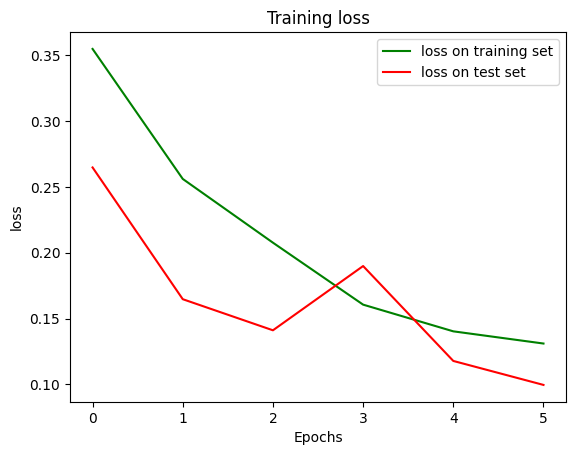

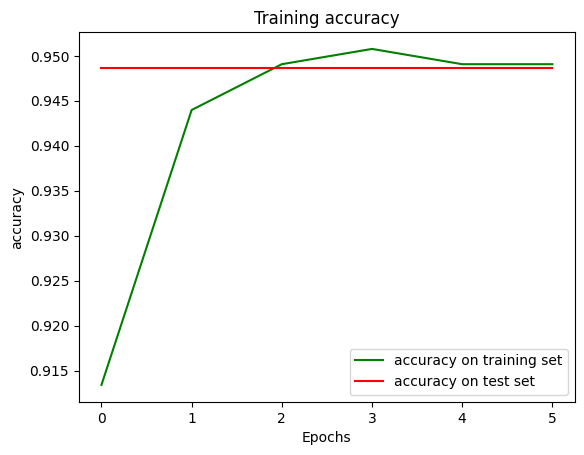

In [10]:
# plot training metrics
plot_metrics_from_model_history(standard_model_history, 'loss')
plot_metrics_from_model_history(standard_model_history, 'accuracy')

In [11]:
# save model
save_model(standard_model, f"unbalanced_standard_{int(standard_model_eval[1] * 100)}")

INFO:tensorflow:Assets written to: models/unbalanced_standard_94-2023-01-19\assets


INFO:tensorflow:Assets written to: models/unbalanced_standard_94-2023-01-19\assets


'models/unbalanced_standard_94-2023-01-19'

In [12]:
# get predictions
standard_predictions = get_labels(convert_predictions(standard_model.predict(X_test)), labels_enc)

8/8 [==============================] - 2s 272ms/step


In [13]:
# get statistics for "part 1" model
print(classification_report(y_test_true_labels, standard_predictions, zero_division=0))

              precision    recall  f1-score   support

   airplanes       0.95      1.00      0.97       240
         ant       0.00      0.00      0.00        13

    accuracy                           0.95       253
   macro avg       0.47      0.50      0.49       253
weighted avg       0.90      0.95      0.92       253



##### Improved model

In [25]:
# define "better" model
def get_better_model():
    pass # TODO

In [ ]:
# get "better" model
better_model = get_better_model()

In [ ]:
# train model
better_model_history = train_model(better_model, X_train, y_train, X_test, y_test, 100, 32)

In [ ]:
# evaluate model
better_model_eval = better_model.evaluate(X_test, y_test)

In [ ]:
# plot training metrics
plot_metrics_from_model_history(better_model_history, 'loss')
plot_metrics_from_model_history(better_model_history, 'accuracy')

In [ ]:
# save model
save_model(better_model, f"unbalanced_better_{int(better_model_eval[1] * 100)}")

In [26]:
# get predictions
better_predictions = get_labels(convert_predictions(better_model.predict(X_test)), labels_enc)

In [ ]:
# get statistics for "better" model
print(classification_report(y_test_true_labels, better_predictions, zero_division=0))

##### Results discussion